<a href="https://colab.research.google.com/github/rahmaashraf310/Heart_Disease_Project/blob/main/notebooks/05_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (303, 13)


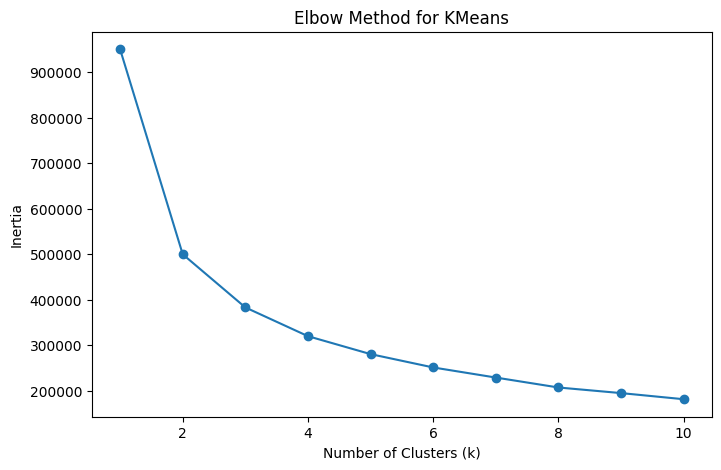

KMeans ARI: 0.030
KMeans Silhouette Score: 0.384


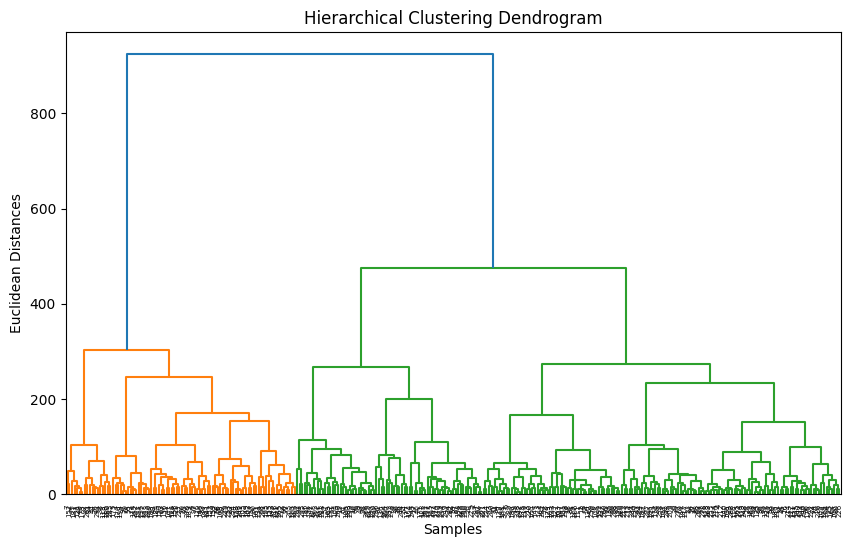

Hierarchical Clustering ARI: 0.037
Hierarchical Clustering Silhouette Score: 0.393

Interpretation:
- Both KMeans and Hierarchical clustering were applied with k=2 (healthy vs disease).
- Adjusted Rand Index (ARI) shows similarity between predicted clusters and actual labels.
- Silhouette Score measures how well the clusters are separated (higher is better).
- In this dataset, ARI is very low → clusters do not align with disease labels.
- Silhouette Score is weak → natural cluster structure is not strong.
- Conclusion: Heart disease classification requires supervised learning for reliable results.



In [ ]:
# =============================================
# Heart Disease Project — Step 2.5 Unsupervised Learning
# =============================================

# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score
import scipy.cluster.hierarchy as sch

# ---------------------------------------------
# 2. Load dataset (reduced features)
# ---------------------------------------------
df = pd.read_csv("results/selected_features.csv")

# Binary target (0 = no disease, 1 = disease)
y_true = (df["target"] > 0).astype(int)
X = df.drop("target", axis=1)

print("Dataset shape:", X.shape)

# ---------------------------------------------
# 3. K-Means Clustering
# ---------------------------------------------
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertia.append(km.inertia_)

# Elbow method plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()

# Fit KMeans with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X)

# Evaluate
ari_kmeans = adjusted_rand_score(y_true, clusters_kmeans)
silhouette_kmeans = silhouette_score(X, clusters_kmeans)

print(f"KMeans ARI: {ari_kmeans:.3f}")
print(f"KMeans Silhouette Score: {silhouette_kmeans:.3f}")

# ---------------------------------------------
# 4. Hierarchical Clustering
# ---------------------------------------------
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distances")
plt.show()

# Agglomerative clustering with k=2
hc = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="ward")
clusters_hc = hc.fit_predict(X)

# Evaluate
ari_hc = adjusted_rand_score(y_true, clusters_hc)
silhouette_hc = silhouette_score(X, clusters_hc)

print(f"Hierarchical Clustering ARI: {ari_hc:.3f}")
print(f"Hierarchical Clustering Silhouette Score: {silhouette_hc:.3f}")

# =============================================
# 5. Interpretation
# =============================================
print("""
Interpretation:
- Both KMeans and Hierarchical clustering were applied with k=2 (healthy vs disease).
- Adjusted Rand Index (ARI) shows similarity between predicted clusters and actual labels.
- Silhouette Score measures how well the clusters are separated (higher is better).
- In this dataset, ARI is very low → clusters do not align with disease labels.
- Silhouette Score is weak → natural cluster structure is not strong.
- Conclusion: Heart disease classification requires supervised learning for reliable results.
""")
